In [1]:
from embhand import EmbeddingsHandler

In [2]:
glove = EmbeddingsHandler.load_glove("wordemb/glove.840B.300d.txt", 5000)

In [3]:
histo_glove = EmbeddingsHandler.load_glove("wordemb/HistoGlove.txt", 5000)

In [4]:
glove.sort_index(inplace=True)
histo_glove.sort_index(inplace=True)

In [5]:
inters = glove.index.intersection(histo_glove.index)

glove = glove[glove.index.isin(inters)]
histo_glove = histo_glove[histo_glove.index.isin(inters)]

In [6]:
glove.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
!,-0.265540,0.33531,0.218600,-0.301000,-0.055470,-0.24236,0.172360,-0.163340,-0.109000,1.2671,...,-0.386450,-0.150560,-0.032827,-0.105290,0.283970,-0.25500,0.15195,-0.178590,-0.062878,0.162320
"""",-0.075242,0.57337,-0.319080,-0.184840,0.888670,-0.27381,0.077588,0.139050,-0.477460,1.4442,...,-0.035604,-0.022669,0.425310,0.063414,0.362130,-0.21280,-0.22615,0.328000,-0.109340,-0.379480
',-0.262620,0.54245,0.071425,-0.146940,0.833820,-0.02344,0.541230,-0.087734,-0.382680,1.3026,...,0.170100,-0.114260,0.210580,-0.069694,0.244570,-0.39003,-0.78634,0.139910,0.018596,-0.001801
'd,0.167020,0.19500,-0.231040,-0.117440,0.045566,0.22862,-0.074997,-0.164560,-0.440080,2.4434,...,-0.298050,0.112270,-0.053644,0.217280,-0.017853,-0.17511,-0.29667,-0.069028,0.446340,0.051480
'll,0.045836,0.30653,-0.230290,0.072489,0.134800,0.06646,-0.264300,0.028182,-0.014016,2.3486,...,-0.326430,0.255490,-0.327890,-0.043240,0.079379,-0.34041,-0.15389,-0.223010,0.416950,-0.019976


In [7]:
histo_glove.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
!,-0.019655,0.095955,-0.282212,0.737599,0.330484,0.420935,-0.621268,-0.812122,0.505107,0.015634,...,0.204971,0.528601,-0.125747,-0.209134,0.156829,0.015388,0.381858,0.265184,0.203366,-0.622750
"""",0.149426,0.322643,-0.050188,0.530837,0.340554,0.702451,-0.256255,-0.104679,0.233661,0.017788,...,0.027598,0.443764,0.172704,-0.824299,-0.239947,-0.001125,0.060868,0.193476,0.104902,-0.357946
',-0.121752,-0.593321,0.171050,0.456702,0.037198,-0.244081,0.333960,0.067703,-0.198061,-0.568978,...,0.157788,0.922211,-0.162942,-0.241585,-0.089456,-0.165942,-0.182704,0.497870,0.216258,-0.447023
'd,-0.118779,0.094283,-0.116295,0.226295,0.343992,0.300804,0.074859,-0.247007,0.039144,-0.409200,...,-0.336859,0.439959,0.022575,-0.095229,0.178095,0.097082,0.196313,-0.202600,-0.039872,-0.422881
'll,0.265077,-0.213783,-0.230821,0.035930,0.068128,0.261483,-0.303432,-0.353126,0.081405,0.006702,...,0.051707,0.596635,-0.227613,-0.158314,0.252468,-0.341069,0.559163,-0.259851,-0.066185,-0.253888


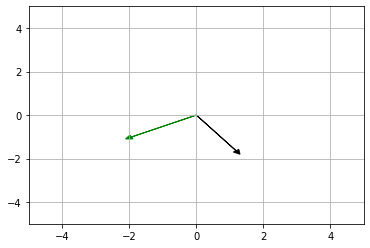

In [8]:
EmbeddingsHandler.plot_word_vectors(histo_glove, glove, "man")

In [9]:
glove_dict = EmbeddingsHandler.to_dict(glove)
histo_dict = EmbeddingsHandler.to_dict(histo_glove)

In [10]:
rs_glove, rs_histo = EmbeddingsHandler.reshape_vocab(glove_dict, histo_dict)

In [11]:
rotated_histo = EmbeddingsHandler.rotate_emb(rs_histo, rs_glove)

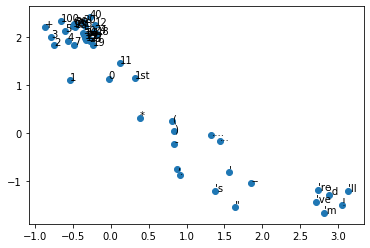

In [12]:
EmbeddingsHandler.plot_words(histo_glove, end=50)

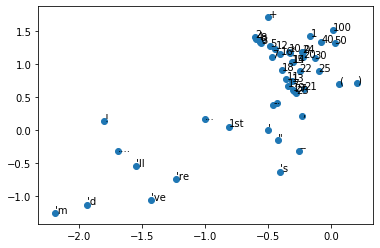

In [13]:
EmbeddingsHandler.plot_words(glove, end=50)

In [14]:
import pandas as pd

rot_histo_df = pd.DataFrame.from_dict(rotated_histo).T

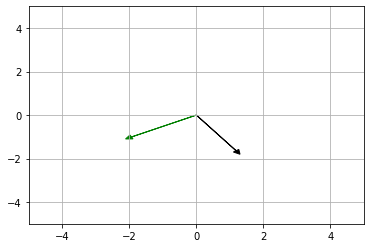

In [15]:
EmbeddingsHandler.plot_word_vectors(rot_histo_df, glove, "man")

In [16]:
EmbeddingsHandler.find_closest_embeddings(glove_dict, glove_dict["man"])

['woman', 'guy', 'boy', 'he', 'men']

In [17]:
EmbeddingsHandler.cosine_distance(glove_dict["man"], glove_dict["man"])

0.0

In [18]:
EmbeddingsHandler.cosine_distance(glove_dict["man"], glove_dict["woman"])

0.2598255446028722

In [19]:
EmbeddingsHandler.cosine_distance(rotated_histo["man"], histo_dict["man"])

0.9775012843208272

In [20]:
EmbeddingsHandler.cosine_distance(rotated_histo["man"], glove_dict["man"])

0.20361643847745303

In [21]:
EmbeddingsHandler.cosine_distance(histo_dict["man"], glove_dict["man"])

0.9725397315320365

In [22]:
words = [('man', 'woman'), ('he', 'she'), ('father', 'mother'), ('male', 'female')]

for w1, w2 in words:
    print(w1, "-", w2)
    print("Glove: ", EmbeddingsHandler.cosine_distance(glove_dict[w1], glove_dict[w2]))
    print("Histo: ", EmbeddingsHandler.cosine_distance(histo_dict[w1], histo_dict[w2]))
    print("Rotated histo: ", EmbeddingsHandler.cosine_distance(rotated_histo[w1], rotated_histo[w2]))
    print("Glove - Rotated histo: ", EmbeddingsHandler.cosine_distance(glove_dict[w1], rotated_histo[w2]))
    print("Histo - Rotated histo: ", EmbeddingsHandler.cosine_distance(histo_dict[w1], rotated_histo[w2]), "\n")

man - woman
Glove:  0.2598255446028722
Histo:  0.33789175706939767
Rotated histo:  0.3378917570693979
Glove - Rotated histo:  0.38455684300556725
Histo - Rotated histo:  0.9918302370594316 

he - she
Glove:  0.21527247932594773
Histo:  0.28377190534703023
Rotated histo:  0.28377190534703023
Glove - Rotated histo:  0.3527994245039944
Histo - Rotated histo:  1.0052514951632092 

father - mother
Glove:  0.17017547261517962
Histo:  0.2388168386518108
Rotated histo:  0.2388168386518107
Glove - Rotated histo:  0.3078084246653042
Histo - Rotated histo:  1.0331843779744472 

male - female
Glove:  0.06572268751590193
Histo:  0.198832372257857
Rotated histo:  0.19883237225785688
Glove - Rotated histo:  0.3272580156949658
Histo - Rotated histo:  1.0777481091962495 

